# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
df = pd.read_csv(r"Salary_Data.csv")

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


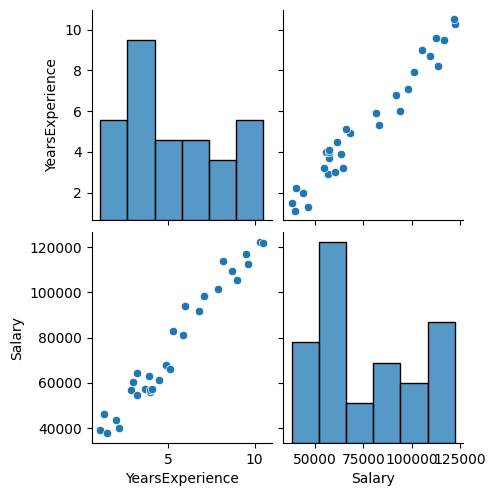

In [4]:
sns.pairplot(df)
plt.show()

In [5]:
X = df.drop(['Salary'],axis=1)
y = df.drop(['YearsExperience'], axis=1)

In [6]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [7]:
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


# Splitting dataset into Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state = 50)

In [9]:
len(X_train)

20

In [10]:
X_train, X_test, y_train, y_test

(    YearsExperience
 10              3.9
 27              9.6
 12              4.0
 3               2.0
 14              4.5
 24              8.7
 15              4.9
 7               3.2
 2               1.5
 22              7.9
 26              9.5
 23              8.2
 5               2.9
 6               3.0
 4               2.2
 1               1.3
 13              4.1
 11              4.0
 0               1.1
 16              5.1,
     YearsExperience
 17              5.3
 8               3.2
 28             10.3
 9               3.7
 18              5.9
 19              6.0
 25              9.0
 20              6.8
 29             10.5
 21              7.1,
       Salary
 10   63218.0
 27  112635.0
 12   56957.0
 3    43525.0
 14   61111.0
 24  109431.0
 15   67938.0
 7    54445.0
 2    37731.0
 22  101302.0
 26  116969.0
 23  113812.0
 5    56642.0
 6    60150.0
 4    39891.0
 1    46205.0
 13   57081.0
 11   55794.0
 0    39343.0
 16   66029.0,
       Salary
 17   83088.0
 8 

In [11]:
len(X_train)

20

In [12]:
len(X_test)

10

In [13]:
len(y_train)

20

In [14]:
len(y_test)

10

# Training Simple Linear Regression model on Training set

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

# Predict test set results

In [17]:
y_pred = reg.predict(X_test)
y_pred

array([[ 74894.4554498 ],
       [ 54816.10622121],
       [122700.04885121],
       [ 59596.66556135],
       [ 80631.12665797],
       [ 81587.238526  ],
       [110270.59456685],
       [ 89236.13347023],
       [124612.27258727],
       [ 92104.46907431]])

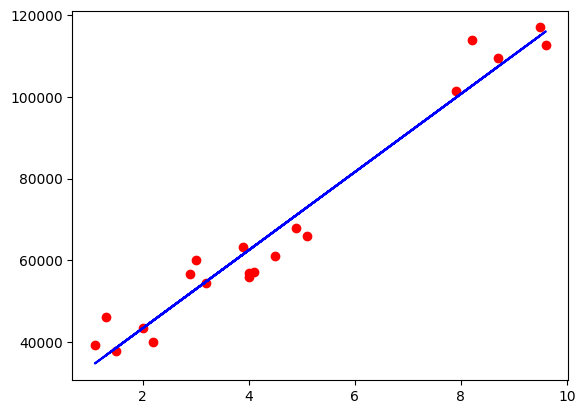

In [18]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, reg.predict(X_train), color = 'blue')

# Visulaising Test set results

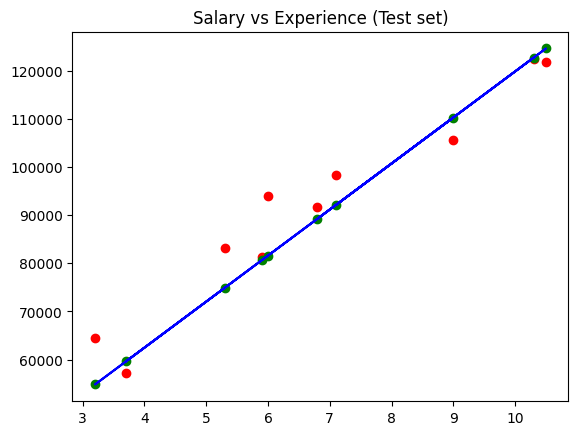

In [19]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, reg.predict(X_test), color = 'blue')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Salary vs Experience (Test set)')
plt.show()

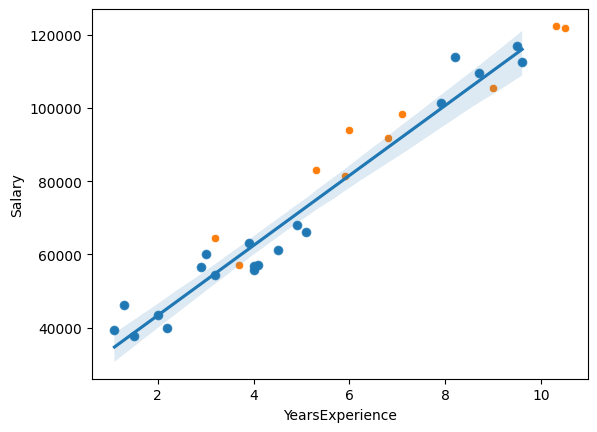

In [20]:
import seaborn as sns
sns.scatterplot(x=X_train['YearsExperience'], y=y_train['Salary'])
sns.scatterplot(x=X_test['YearsExperience'], y=y_test['Salary'])
sns.regplot(x=X_train['YearsExperience'], y=y_train['Salary'])
plt.show()

RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

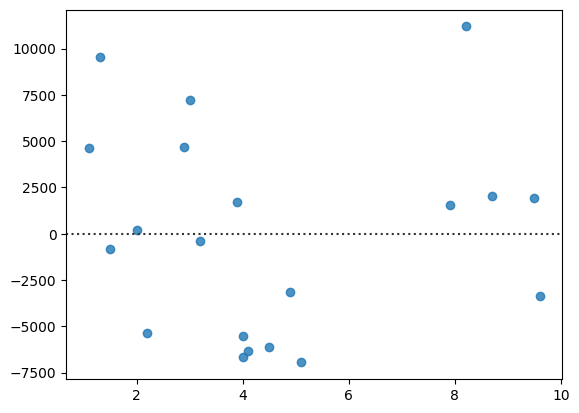

In [21]:
# residual error plot
sns.residplot(x=X_train['YearsExperience'], y=y_train['Salary'], lowess=True)

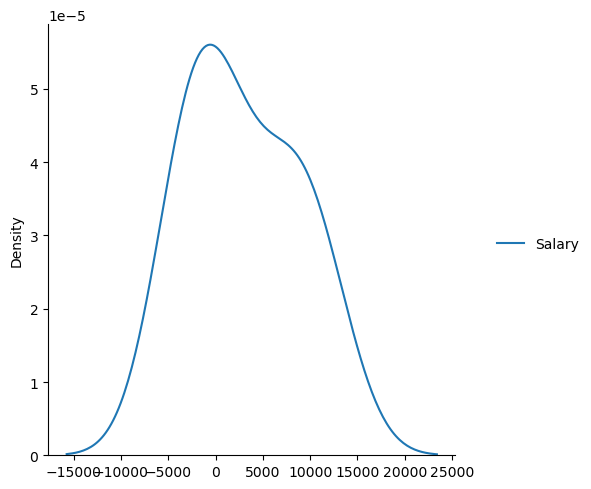

In [ ]:
# residual error plot for normal distribution
sns.displot((y_test-y_pred), kind='kde')
plt.show()

<Axes: xlabel='Salary', ylabel='Salary'>

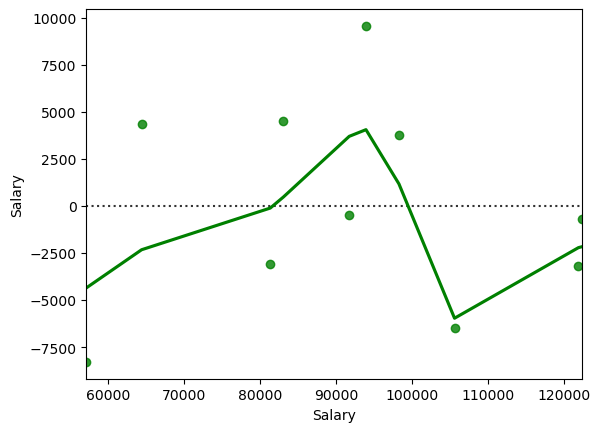

In [ ]:
#residult plot shows residual error vs true y value. There should be no clear line or curve.
sns.residplot(x=y_test['Salary'], y=(y_test-y_pred), lowess=True, color='g')

In [ ]:
# Mean absolute error 
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_pred)



4972.305216715689